# Load libraries

In [1]:
import glob
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean

In [2]:
from dask.distributed import Client
client = Client()
client

2022-07-06 20:42:02,434 - distributed.diskutils - INFO - Found stale lock file and directory '/home/anthony/Drive/Thesis/sandbox/dask-worker-space/worker-7k60mxrj', purging
2022-07-06 20:42:02,434 - distributed.diskutils - INFO - Found stale lock file and directory '/home/anthony/Drive/Thesis/sandbox/dask-worker-space/worker-n54avrxd', purging
2022-07-06 20:42:02,435 - distributed.diskutils - INFO - Found stale lock file and directory '/home/anthony/Drive/Thesis/sandbox/dask-worker-space/worker-a0ytvnhv', purging
2022-07-06 20:42:02,435 - distributed.diskutils - INFO - Found stale lock file and directory '/home/anthony/Drive/Thesis/sandbox/dask-worker-space/worker-7h10cy1h', purging


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 12,Total memory: 15.48 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:37727,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 12
Started: Just now,Total memory: 15.48 GiB
Comm: tcp://127.0.0.1:38963,Total threads: 3
Dashboard: http://127.0.0.1:38337/status,Memory: 3.87 GiB
Nanny: tcp://127.0.0.1:39739,


# Load datasets

In [3]:
msl_ds = xr.open_dataset("../data_raw/era5slvmonthly-costa/mslp.grib", 
                           chunks = {'time': '500MB'},
                           engine = "cfgrib")
msl_ds

Ignoring index file '../data_raw/era5slvmonthly-costa/mslp.grib.923a8.idx' incompatible with GRIB file


<xarray.Dataset>
Dimensions:     (time: 4608, latitude: 41, longitude: 41)
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 1990-01-01 ... 2005-12-01T23:00:00
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 17.0 16.75 16.5 16.25 ... 7.75 7.5 7.25 7.0
  * longitude   (longitude) float64 -91.0 -90.75 -90.5 ... -81.5 -81.25 -81.0
    valid_time  (time) datetime64[ns] dask.array<chunksize=(4608,), meta=np.ndarray>
Data variables:
    msl         (time, latitude, longitude) float32 dask.array<chunksize=(4608, 41, 41), meta=np.ndarray>
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-07-06T20:42 GRIB to CDM+CF via cfgrib-0.9.1...

In [7]:
lai_files = glob.glob("../data_raw/c3slaiv3-global/*.nc")
lai_files.sort()
lai_files

['../data_raw/c3slaiv3-global/c3s_LAI_19900710000000_GLOBE_AVHRR-NOAA11_V3.0.1.nc',
 '../data_raw/c3slaiv3-global/c3s_LAI_19910710000000_GLOBE_AVHRR-NOAA11_V3.0.1.nc',
 '../data_raw/c3slaiv3-global/c3s_LAI_19920710000000_GLOBE_AVHRR-NOAA11_V3.0.1.nc',
 '../data_raw/c3slaiv3-global/c3s_LAI_19930710000000_GLOBE_AVHRR-NOAA11_V3.0.1.nc',
 '../data_raw/c3slaiv3-global/c3s_LAI_19940710000000_GLOBE_AVHRR-NOAA11_V3.0.1.nc',
 '../data_raw/c3slaiv3-global/c3s_LAI_19950710000000_GLOBE_AVHRR-NOAA14_V3.0.1.nc',
 '../data_raw/c3slaiv3-global/c3s_LAI_19960710000000_GLOBE_AVHRR-NOAA14_V3.0.1.nc',
 '../data_raw/c3slaiv3-global/c3s_LAI_19970710000000_GLOBE_AVHRR-NOAA14_V3.0.1.nc',
 '../data_raw/c3slaiv3-global/c3s_LAI_19980710000000_GLOBE_AVHRR-NOAA14_V3.0.1.nc',
 '../data_raw/c3slaiv3-global/c3s_LAI_19990710000000_GLOBE_AVHRR-NOAA14_V3.0.1.nc',
 '../data_raw/c3slaiv3-global/c3s_LAI_20000710000000_GLOBE_AVHRR-NOAA14_V3.0.1.nc',
 '../data_raw/c3slaiv3-global/c3s_LAI_20010710000000_GLOBE_AVHRR-NOAA16_V3.0

In [8]:
lai_ds = xr.open_mfdataset(lai_files, 
                           chunks = {'time': '500MB'},
                           engine = "netcdf4")
lai_ds

<xarray.Dataset>
Dimensions:         (time: 16, lon: 10800, lat: 4200)
Coordinates:
  * time            (time) datetime64[ns] 1990-07-10 1991-07-10 ... 2005-07-10
  * lon             (lon) float64 -180.0 -180.0 -179.9 ... 179.9 179.9 180.0
  * lat             (lat) float64 80.0 79.97 79.93 79.9 ... -59.9 -59.93 -59.97
Data variables:
    crs             (time) |S1 b'' b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b''
    LAI             (time, lat, lon) float32 dask.array<chunksize=(1, 4200, 10800), meta=np.ndarray>
    LAI_ERR         (time, lat, lon) float32 dask.array<chunksize=(1, 4200, 10800), meta=np.ndarray>
    retrieval_flag  (time, lat, lon) float64 dask.array<chunksize=(1, 4200, 10800), meta=np.ndarray>
Attributes: (12/29)
    time_coverage_end:    1990-07-10T23:59:59Z
    time_coverage_start:  1990-06-20T00:00:00Z
    platform:             AVHRR2
    sensor:               NOAA11
    Conventions:          CF-1.6
    archive_facility:     VITO
    ...                   ...
    comment:              Please refer to Product user Guide for more informa...
    contact:              tip(at)FastOpt.com
    summary:              This file contains the Essential Climate Variable (...
    tiptable_version:     V1.3
    date_created:         2021-03-15
    tracking_id:          ef398629-0cf5-4dc3-a7bf-1e2e6be1fda2

# msl: shift lat and lon coordinates so they represent centre rather than top left of each grid cell, then downsample using coarsen

In [37]:
msl_da = msl_ds["msl"]
msl_da = (msl_da
          .assign_coords({"latitude": msl_da.latitude - 0.125,
                          "longitude": msl_da.longitude + 0.125})
         )
msl_da

<xarray.DataArray 'msl' (time: 4608, latitude: 41, longitude: 41)>
dask.array<open_dataset-db585563dab794b71f94d47adf032f38msl, shape=(4608, 41, 41), dtype=float32, chunksize=(4608, 41, 41), chunktype=numpy.ndarray>
Coordinates:
    number      int64 0
  * time        (time) datetime64[ns] 1990-01-01 ... 2005-12-01T23:00:00
    step        timedelta64[ns] 00:00:00
    surface     float64 0.0
  * latitude    (latitude) float64 16.88 16.62 16.38 16.12 ... 7.375 7.125 6.875
  * longitude   (longitude) float64 -90.88 -90.62 -90.38 ... -81.12 -80.88
    valid_time  (time) datetime64[ns] dask.array<chunksize=(4608,), meta=np.ndarray>
Attributes:
    GRIB_paramId:                             151
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      1681
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avgua
    GRIB_gridType:                            regular_ll
    GRIB_NV:                                  0
    GRIB_Nx:                                  41
    GRIB_Ny:                                  41
    GRIB_cfName:                              air_pressure_at_mean_sea_level
    GRIB_cfVarName:                           msl
    GRIB_gridDefinitionDescription:           Latitude/Longitude Grid
    GRIB_iDirectionIncrementInDegrees:        0.25
    GRIB_iScansNegatively:                    0
    GRIB_jDirectionIncrementInDegrees:        0.25
    GRIB_jPointsAreConsecutive:               0
    GRIB_jScansPositively:                    0
    GRIB_latitudeOfFirstGridPointInDegrees:   17.0
    GRIB_latitudeOfLastGridPointInDegrees:    7.0
    GRIB_longitudeOfFirstGridPointInDegrees:  -91.0
    GRIB_longitudeOfLastGridPointInDegrees:   -81.0
    GRIB_missingValue:                        9999
    GRIB_name:                                Mean sea level pressure
    GRIB_shortName:                           msl
    GRIB_totalNumber:                         0
    GRIB_units:                               Pa
    long_name:                                Mean sea level pressure
    units:                                    Pa
    standard_name:                            air_pressure_at_mean_sea_level

In [27]:
msl_da = msl_da.coarsen(latitude=2, longitude=2, boundary="trim").mean()
msl_da

<xarray.DataArray 'msl' (time: 4608, latitude: 20, longitude: 20)>
dask.array<mean_agg-aggregate, shape=(4608, 20, 20), dtype=float32, chunksize=(4608, 20, 20), chunktype=numpy.ndarray>
Coordinates:
    number      int64 0
  * time        (time) datetime64[ns] 1990-01-01 ... 2005-12-01T23:00:00
    step        timedelta64[ns] 00:00:00
    surface     float64 0.0
  * latitude    (latitude) float64 16.75 16.25 15.75 15.25 ... 8.25 7.75 7.25
  * longitude   (longitude) float64 -90.75 -90.25 -89.75 ... -81.75 -81.25
    valid_time  (time) datetime64[ns] dask.array<chunksize=(4608,), meta=np.ndarray>
Attributes:
    GRIB_paramId:                             151
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      1681
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avgua
    GRIB_gridType:                            regular_ll
    GRIB_NV:                                  0
    GRIB_Nx:                                  41
    GRIB_Ny:                                  41
    GRIB_cfName:                              air_pressure_at_mean_sea_level
    GRIB_cfVarName:                           msl
    GRIB_gridDefinitionDescription:           Latitude/Longitude Grid
    GRIB_iDirectionIncrementInDegrees:        0.25
    GRIB_iScansNegatively:                    0
    GRIB_jDirectionIncrementInDegrees:        0.25
    GRIB_jPointsAreConsecutive:               0
    GRIB_jScansPositively:                    0
    GRIB_latitudeOfFirstGridPointInDegrees:   17.0
    GRIB_latitudeOfLastGridPointInDegrees:    7.0
    GRIB_longitudeOfFirstGridPointInDegrees:  -91.0
    GRIB_longitudeOfLastGridPointInDegrees:   -81.0
    GRIB_missingValue:                        9999
    GRIB_name:                                Mean sea level pressure
    GRIB_shortName:                           msl
    GRIB_totalNumber:                         0
    GRIB_units:                               Pa
    long_name:                                Mean sea level pressure
    units:                                    Pa
    standard_name:                            air_pressure_at_mean_sea_level

# lai: shift lat and lon coordinates so they represent centre rather than top left of each grid cell, then downsample using coarsen

In [33]:
lai_da = lai_ds["LAI"].sel(lat = slice(17.001, 7), lon = slice(-91.001, -81))
lai_da = (lai_da
          .assign_coords({"lat": lai_da.lat - 1/60,
                          "lon": lai_da.lon + 1/60,
                          "time": lai_da.time.dt.strftime("%b-%Y")})
         )
lai_da

<xarray.DataArray 'LAI' (time: 16, lat: 301, lon: 301)>
dask.array<getitem, shape=(16, 301, 301), dtype=float32, chunksize=(1, 301, 301), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 'Jul-1990' 'Jul-1991' ... 'Jul-2004' 'Jul-2005'
  * lon      (lon) float64 -90.98 -90.95 -90.92 -90.88 ... -81.05 -81.02 -80.98
  * lat      (lat) float64 16.98 16.95 16.92 16.88 ... 7.083 7.05 7.017 6.983
Attributes:
    long_name:      Effective Leaf Area Index 4km
    grid_mapping:   crs
    standard_name:  leaf_area_index
    units:          m2.m-2
    valid_range:    [    0 65534]

In [32]:
lai_da = lai_da.coarsen(lat=15, lon=15, boundary="trim").mean()
lai_da

<xarray.DataArray 'LAI' (time: 16, lat: 20, lon: 20)>
dask.array<mean_agg-aggregate, shape=(16, 20, 20), dtype=float32, chunksize=(1, 20, 20), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1990-07-10 1991-07-10 ... 2005-07-10
  * lon      (lon) float64 -90.75 -90.25 -89.75 -89.25 ... -82.25 -81.75 -81.25
  * lat      (lat) float64 16.75 16.25 15.75 15.25 14.75 ... 8.75 8.25 7.75 7.25
Attributes:
    long_name:      Effective Leaf Area Index 4km
    grid_mapping:   crs
    standard_name:  leaf_area_index
    units:          m2.m-2
    valid_range:    [    0 65534]

# Putting things together

In [1]:
import glob
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean
from dask.distributed import Client

In [2]:
client = Client()
client

2022-07-06 23:51:13,407 - distributed.diskutils - INFO - Found stale lock file and directory '/home/anthony/Drive/Thesis/sandbox/dask-worker-space/worker-5ru9qqk9', purging
2022-07-06 23:51:13,407 - distributed.diskutils - INFO - Found stale lock file and directory '/home/anthony/Drive/Thesis/sandbox/dask-worker-space/worker-kw3iv5mh', purging
2022-07-06 23:51:13,407 - distributed.diskutils - INFO - Found stale lock file and directory '/home/anthony/Drive/Thesis/sandbox/dask-worker-space/worker-z1wj59n_', purging
2022-07-06 23:51:13,407 - distributed.diskutils - INFO - Found stale lock file and directory '/home/anthony/Drive/Thesis/sandbox/dask-worker-space/worker-n44sqvdi', purging
2022-07-06 23:51:13,407 - distributed.diskutils - INFO - Found stale lock file and directory '/home/anthony/Drive/Thesis/sandbox/dask-worker-space/worker-b7six22u', purging
2022-07-06 23:51:13,408 - distributed.diskutils - INFO - Found stale lock file and directory '/home/anthony/Drive/Thesis/sandbox/dask-w

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 12,Total memory: 15.48 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:43541,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 12
Started: Just now,Total memory: 15.48 GiB
Comm: tcp://127.0.0.1:43265,Total threads: 3
Dashboard: http://127.0.0.1:33181/status,Memory: 3.87 GiB
Nanny: tcp://127.0.0.1:40105,


In [3]:
msl_ds = xr.open_dataset("../data_raw/era5slvmonthly-costa/mslp.grib", 
                           chunks = {'time': '500MB'},
                           engine = "cfgrib")
msl_ds = msl_ds.rename({"latitude": "lat",
               "longitude": "lon"}) # standardise names for xarray operations later

Ignoring index file '../data_raw/era5slvmonthly-costa/mslp.grib.923a8.idx' incompatible with GRIB file


In [4]:
msl_da = msl_ds["msl"]
msl_da = (msl_da
          .assign_coords({"lat": msl_da.lat - 0.125,   # shift lat and lon coordinates by half of grid cell size since ERA5 data uses coordinates to define top left of grid cell
                          "lon": msl_da.lon + 0.125})  # whereas xarray plotting assumes coordinates refer to middle of grid cell
          .coarsen(time=24)
          .mean()                                      # monthly averaged ERA5 was obtained for each hour of the day, this averages over the hours to get average mslp over the month
          .coarsen(lat=2, lon=2, boundary="trim")      # ERA5 has 0.25 deg res while LAI has 1/30 deg res, lcm of these is 0.5 deg
          .mean()                                      # downsample the resolution to 0.5 deg by averaging over 4 grid cells (2 lat x 2 lon)
         )
msl_da = msl_da.assign_coords({"time": msl_da.time.dt.strftime("%b-%Y")}) # standardise coordinates for xarray operations later

In [5]:
lat_coords = msl_da["lat"].data
lon_coords = msl_da["lon"].data

In [6]:
lai_files = glob.glob("../data_raw/c3slaiv3-global/*.nc")
lai_files.sort()
lai_ds = xr.open_mfdataset(lai_files, 
                           chunks = {'time': '500MB'},
                           engine = "netcdf4")

In [7]:
lai_da = lai_ds["LAI"].sel(lat = slice(17.001, 7), lon = slice(-91.001, -81))
lai_da = (lai_da
          .assign_coords({"lat": lai_da.lat - 1/60, # shift lat and lon coordinates by half of grid cell size since ERA5 data uses coordinates to define top left of grid cell
                          "lon": lai_da.lon + 1/60, # whereas xarray plotting assumes coordinates refer to middle of grid cell
                          "time": lai_da.time.dt.strftime("%b-%Y")}) # standardise coordinates for xarray operations later
          .coarsen(lat=15, lon=15, boundary="trim") # ERA5 has 0.25 deg res while LAI has 1/30 deg res, lcm of these is 0.5 deg
          .mean()                                   # downsample the resolution to 0.5 deg by averaging over 225 grid cells (15 lat x 15 lon)
         )
lai_da = lai_da.assign_coords({"lat": lat_coords, "lon": lon_coords}) # standardise coordinates for xarray operations later (this line is to avoid point errors)

In [45]:
# msl_da, lai_da = xr.align(msl_da, lai_da, join = "inner")

CPU times: user 396 ms, sys: 24.7 ms, total: 420 ms
Wall time: 1.64 s


/home/anthony/anaconda3/envs/thesis/lib/python3.10/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


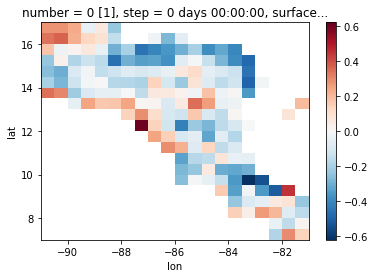

In [9]:
%%time
corr = xr.corr(msl_da, lai_da, dim = "time")
corr.plot()

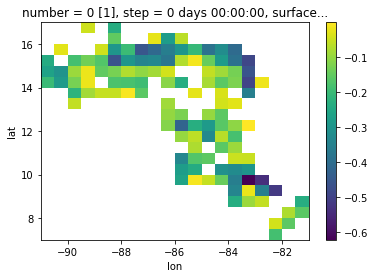

In [10]:
corr.where(corr.data < 0).plot()

/home/anthony/anaconda3/envs/thesis/lib/python3.10/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


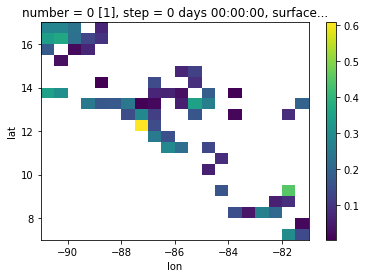

In [11]:
corr.where(corr.data > 0).plot()

CPU times: user 277 ms, sys: 12.2 ms, total: 289 ms
Wall time: 1.51 s


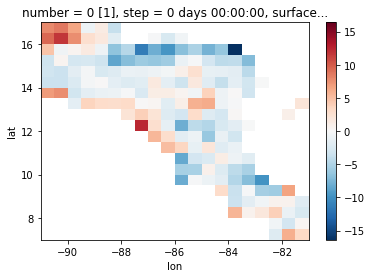

In [12]:
%%time
cov = xr.cov(msl_da, lai_da, dim = "time")
cov.plot()

In [27]:
lai_da_downsamp = (lai_da
                   .coarsen(lat=3, lon=3, boundary="trim")
                   .mean())

In [ ]:
lai_da_downsamp = (lai_da
                   .coarsen(lat=3, lon=3)
                   .mean())

lai_da_downsamp = (lai_da_downsamp
                   .assign_coords({
                       "lat" : np.round(lai_da_downsamp.lat - 1/30, 2),
                       "lon" : np.round(lai_da_downsamp.lon + 1/30, 2)})
                   .pad(pad_width = {"lat": (1, 0), "lon": (1, 0)}, mode = "constant", constant_values = {"lat": (0, 0), "lon": (0, 0)}))

lai_da_downsamp = (lai_da_downsamp
                   .assign_coords({
                       "lat" : lai_da_downsamp.lat.isel(lat = slice(1, None)).pad(lat=(1,0), constant_values=(17,0)),
                       "lon" : lai_da_downsamp.lon.isel(lon = slice(1, None)).pad(lon=(1,0), constant_values=(-91,0))}))

In [ ]:
lai_da_downsamp.coarsen(lat=5, lon=5, boundary = "pad").mean()

In [ ]:
lai_da_downsamp

In [ ]:
client.close()